# Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BlackFriday.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# -----------------------------------------------------------------------------------------
# Column Description


User_ID: This is a unique identifier assigned to each individual customer. It helps track the purchasing behavior and preferences of different customers.

Product_ID: Similarly to the User_ID, Product_ID is a unique identifier for each product that is being sold. It allows you to link purchases to specific products and analyze sales trends.

Gender: This column indicates the gender of the customer making the purchase. Gender can be used to segment the data and analyze whether certain products are more popular among a specific gender.

Age: The age of the customer is important for demographic analysis. It helps you understand which age groups are the most active buyers and tailor marketing strategies accordingly.

Occupation: This column represents the occupation of the customer. Occupation data can provide insights into the purchasing behavior of different professional groups.

City_Category: This indicates the category of the city where the customer is located. Cities can be categorized based on various factors like population size, development level, etc. This information can be useful for regional marketing strategies.

Stay_In_Current_City_Years: This column represents the number of years the customer has been staying in the current city. It might offer insights into customer loyalty and behavior over time.
Marital_Status: This indicates the marital status of the customer. It can be used to understand the preferences and purchasing behavior of married vs. unmarried customers.

Product_Category_1: This column categorizes the product into a broader category. For example, electronics, clothing, furniture, etc. This categorization helps in analyzing which types of products are most popular.

Product_Category_2: This is a more specific sub-category of the product. Some products might belong to multiple categories, so this column provides additional detail about the product type.

Product_Category_3: Similar to Product_Category_2, this column further categorizes the product, potentially offering even more detail about the item being purchased.

Purchase: This is a numerical column representing the purchase amount in terms of currency. It's a crucial column for analysis since it's the primary focus of understanding customer spending habits and product popularity.

## Analyzing Columns

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
df.shape

(537577, 12)

Unique values in each columns : 


In [7]:
for column in df.columns:
    print(column, ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [11]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
df['Marital_Status'].unique()

array([0, 1])

In [14]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

# -----------------------------------------------------------------------------------------
# Treating NULL Values : 

In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [16]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64


In [17]:
df.shape

(537577, 12)

## The following columns of product category 2 and 3 are having many null values, 
## So better option is to drop those columns and proceed with the dataset

### Dropping the columns : 

In [18]:
df.drop(['Product_Category_2','Product_Category_3'], inplace = True, axis = 1)

The new Dataset : 

In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# BoxPlot (Handling Outliers) : 

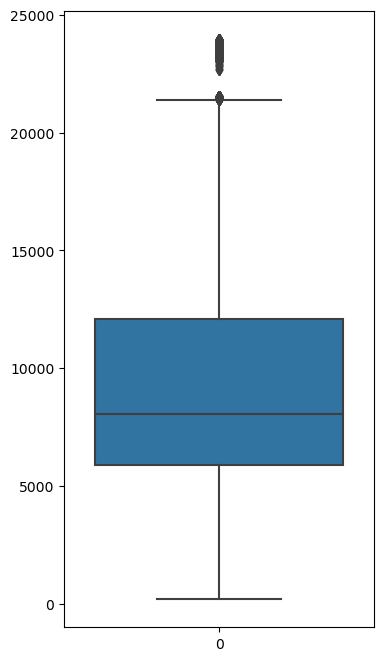

In [20]:
plt.figure(figsize=(4,8))
sns.boxplot(data = df["Purchase"])
plt.show()

In [21]:
Q1 = np.percentile(df["Purchase"],25)
print(Q1)
Q3 = np.percentile(df["Purchase"],75) 
print(Q3)

5866.0
12073.0


In [22]:
IQR = Q3 - Q1

In [23]:
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

In [24]:
Outliers = [] 
 
for i in df["Purchase"]: 
  if ((i > upp) or (i < low)): 
    Outliers.append(i) 
     
     
Outliers

[23603,
 23792,
 23233,
 23595,
 23341,
 23826,
 23139,
 23159,
 23741,
 23728,
 23239,
 23424,
 23395,
 23384,
 21518,
 21544,
 23562,
 23182,
 21567,
 23564,
 23595,
 23227,
 23449,
 23650,
 23126,
 23181,
 23892,
 23912,
 23151,
 23843,
 23366,
 23607,
 23632,
 23958,
 23280,
 23507,
 21410,
 23596,
 23222,
 23251,
 23358,
 23637,
 23793,
 23889,
 21503,
 21530,
 23824,
 23155,
 23649,
 23359,
 23604,
 23121,
 23227,
 23502,
 23438,
 23913,
 23081,
 23343,
 23702,
 21524,
 21390,
 23533,
 23589,
 23249,
 23518,
 23684,
 23069,
 23778,
 23840,
 23271,
 23269,
 23489,
 23592,
 23919,
 23635,
 23929,
 23080,
 23460,
 23802,
 23162,
 23174,
 21487,
 23625,
 23879,
 23665,
 23082,
 23262,
 23092,
 23047,
 23267,
 23302,
 23558,
 23322,
 23883,
 21540,
 23063,
 23437,
 23671,
 23887,
 23836,
 21453,
 23910,
 21482,
 23288,
 23664,
 23056,
 23510,
 21530,
 23796,
 23893,
 23267,
 21504,
 23084,
 23932,
 23455,
 23115,
 23492,
 23615,
 23451,
 23082,
 21412,
 21415,
 23042,
 23492,
 23175,


In [25]:
len(Outliers)

2665

# -----------------------------------------------------------------------------------------
# Analyzing Gender :  (Univariate)

<AxesSubplot:ylabel='Ratio'>

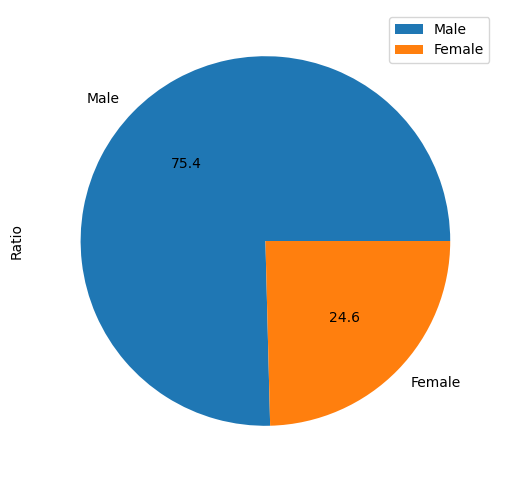

In [26]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

<AxesSubplot:xlabel='Gender'>

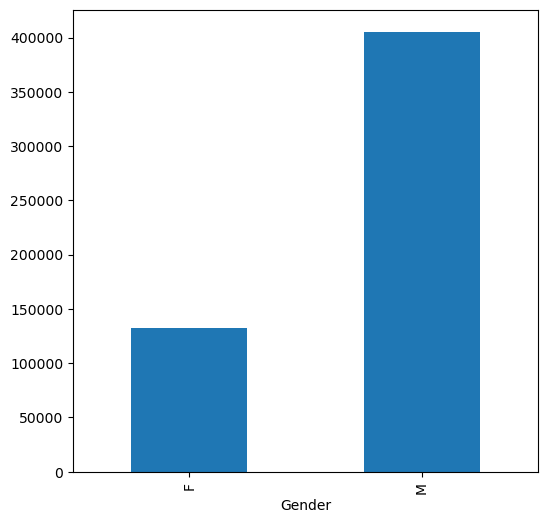

In [27]:
df.groupby('Gender').size().plot(kind = 'bar', figsize = (6,6))

In [28]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

### Percentage of Purchase done by each gender

In [29]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<AxesSubplot:ylabel='Purchase'>

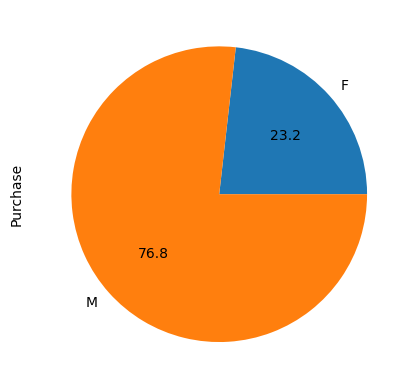

In [30]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

### Using Hypothesis testing to determine the purchase done by each gender and with marital status

## T-Test

In [31]:
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

# Performing T-Test
t_statistic, p_value = ttest_ind(male_data[:len(female_data)], female_data, equal_var = True)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in purchase amounts between Male and Female groups.")
else:
    print("There is no significant difference in purchase amounts between Male and Female groups.")

T-statistic: 35.669422675007816
P-value: 5.4307987033599305e-278
There is a significant difference in purchase amounts between Male and Female groups.


## F-Test (ANOVA)

In [32]:
marital_status_0 = df[df['Marital_Status'] == 0]['Purchase']
marital_status_1 = df[df['Marital_Status'] == 1]['Purchase']

# Performing F-test
f_statistic, p_value = f_oneway(marital_status_0, marital_status_1)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")


F-statistic: 0.008948303078011218
P-value: 0.9246361830127376
Fail to reject the null hypothesis. Variances are not significantly different.


# -----------------------------------------------------------------------------------------

# Analyzing Age and Marital Status (Bivariate)

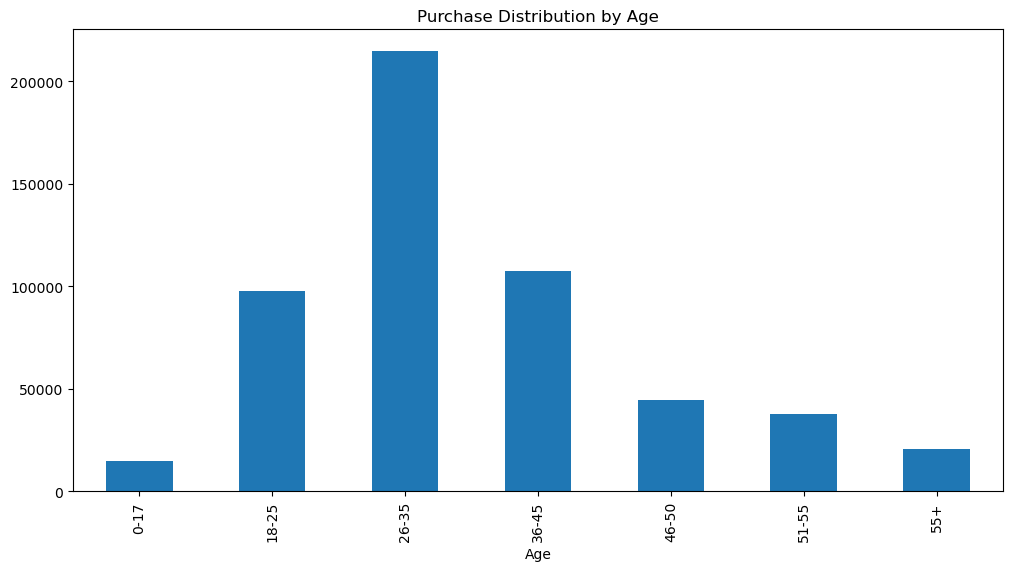

In [33]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')
plt.show()

In [34]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

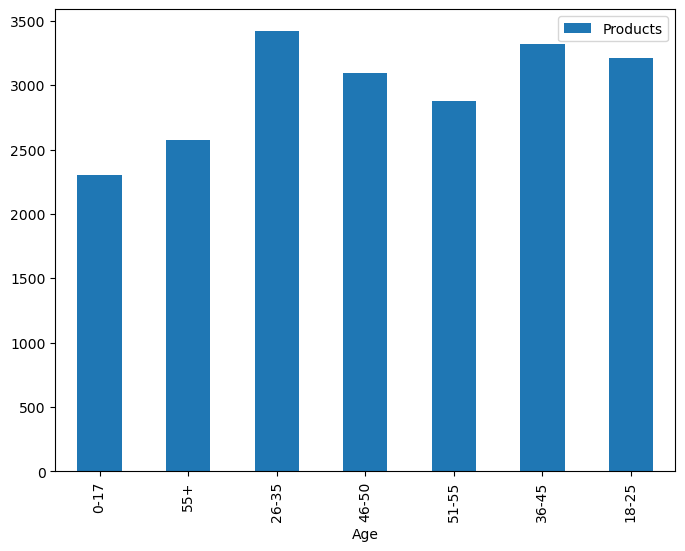

In [35]:
data.plot.bar(x = 'Age', figsize = (8,6))
plt.show()

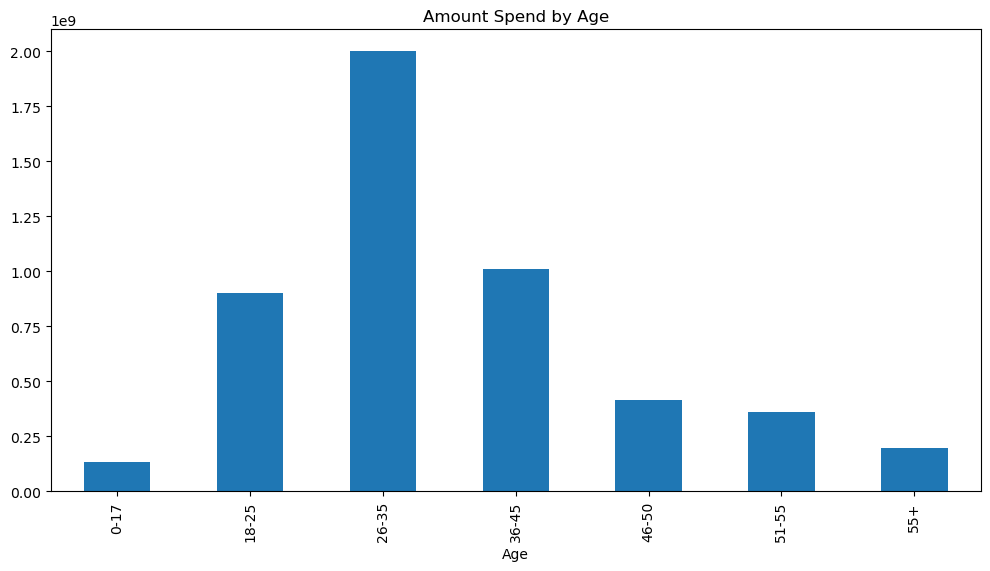

In [36]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')
plt.show()

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

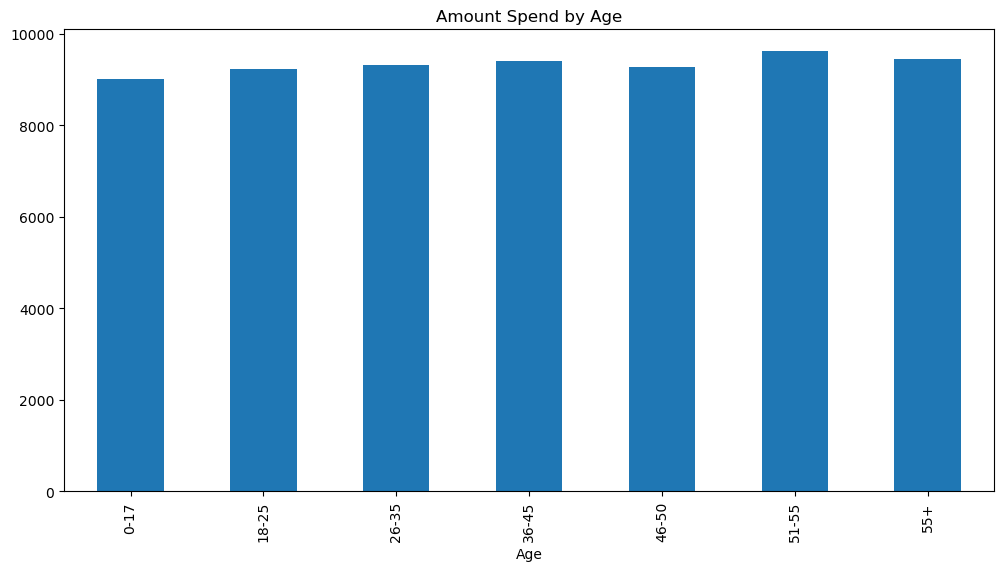

In [37]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

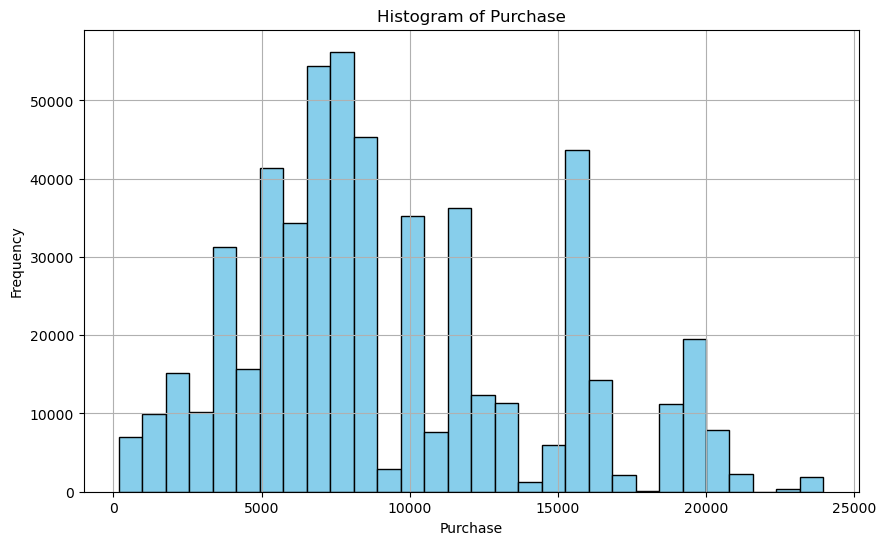

In [38]:
plt.figure(figsize=(10,6))
plt.hist(df['Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='Purchase'>

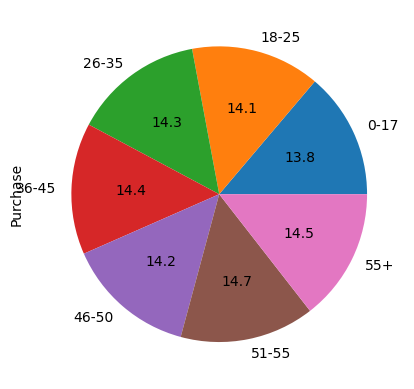

In [39]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:ylabel='None'>

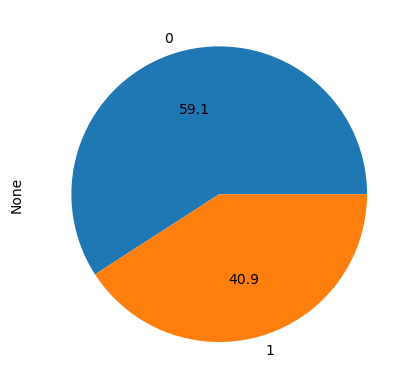

In [40]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:ylabel='None'>

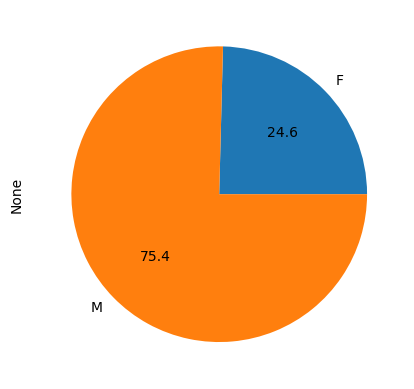

In [41]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f')

# -----------------------------------------------------------------------------------------

# Multi Column Analysis (Bivariate)

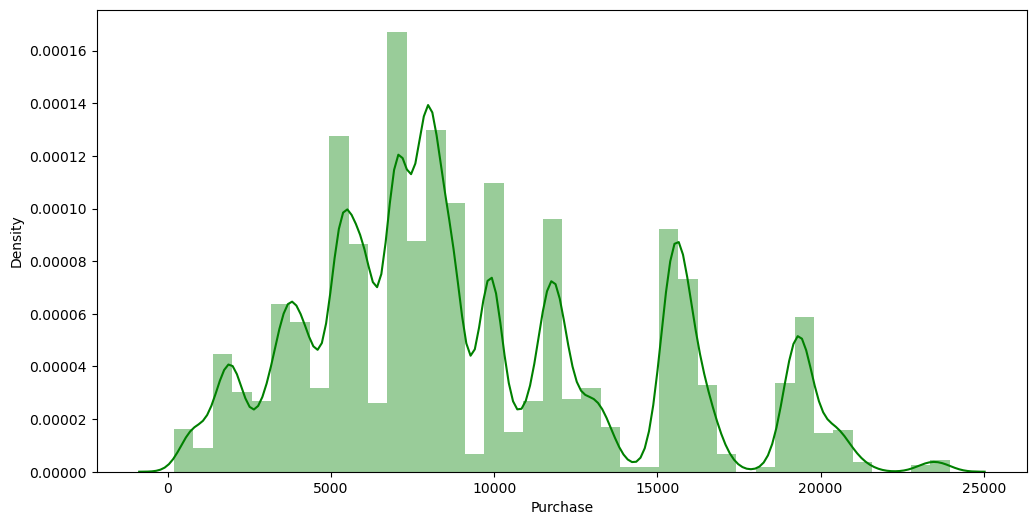

In [42]:
plt.figure(figsize = (12,6))
sns.distplot(df.Purchase, kde = True, bins = 40, color = 'green')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

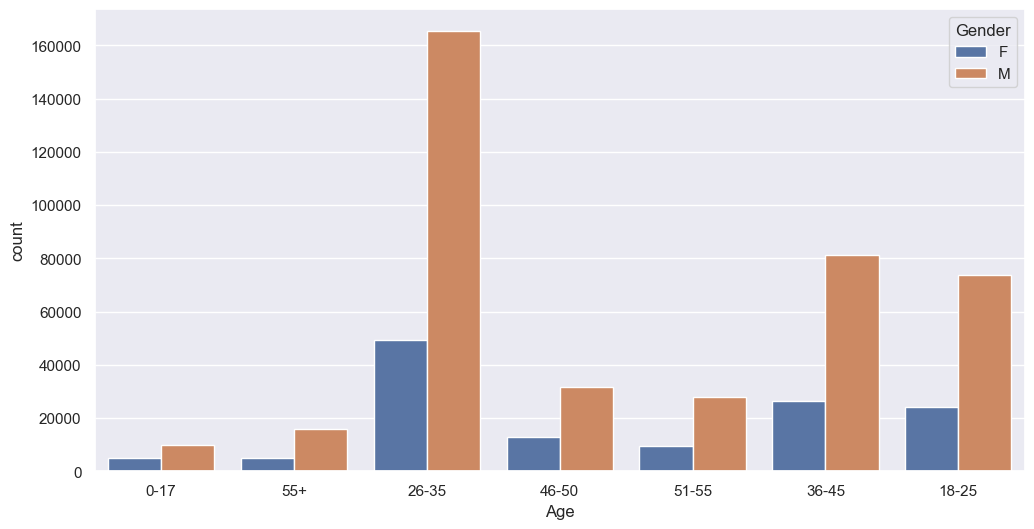

In [43]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

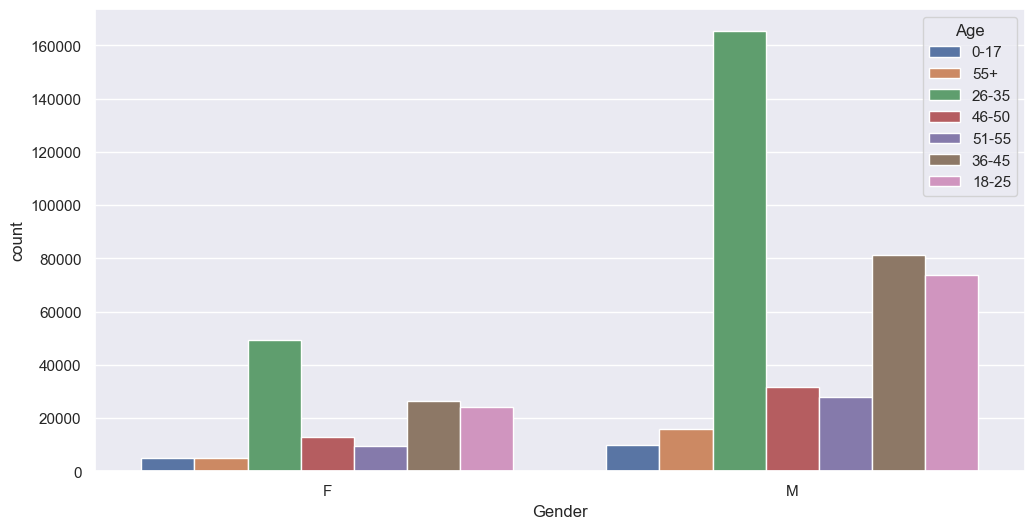

In [44]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

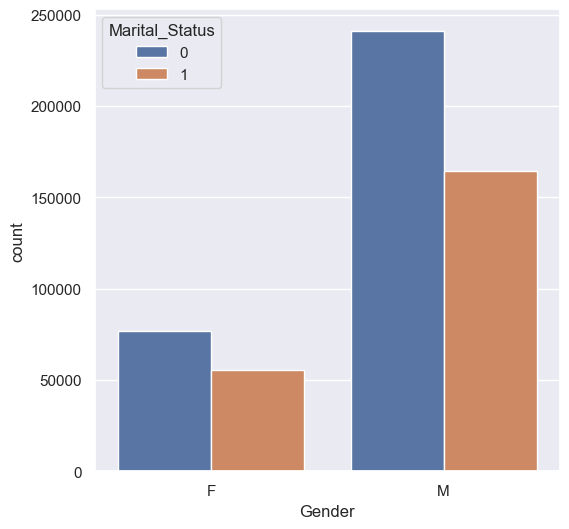

In [45]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

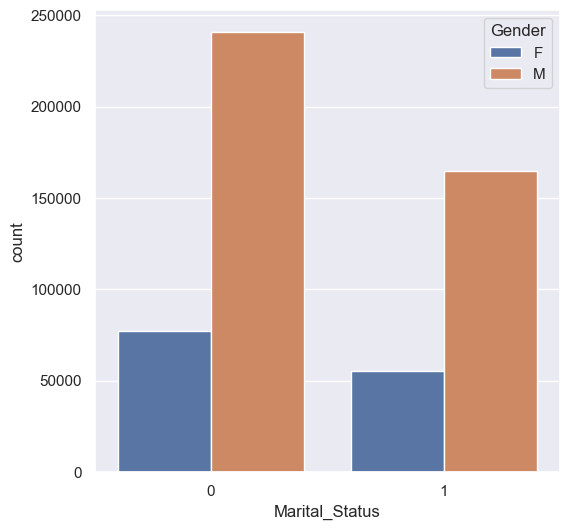

In [46]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Marital_Status", hue = 'Gender', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

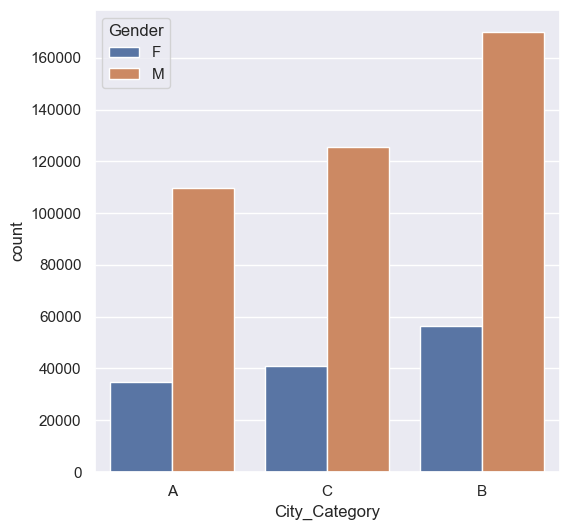

In [47]:
sns.countplot(x = df['City_Category'], hue = df['Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

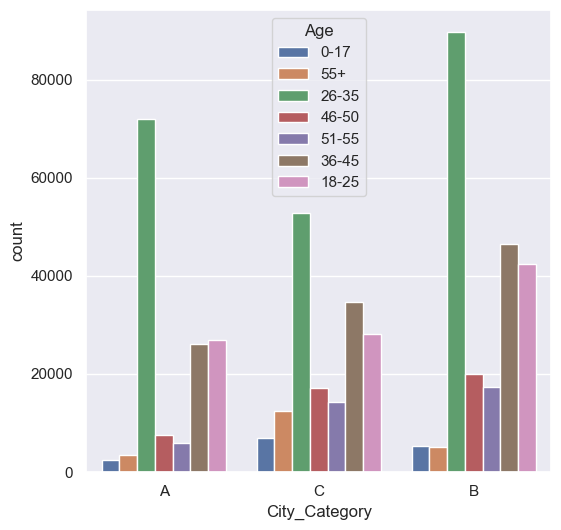

In [48]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

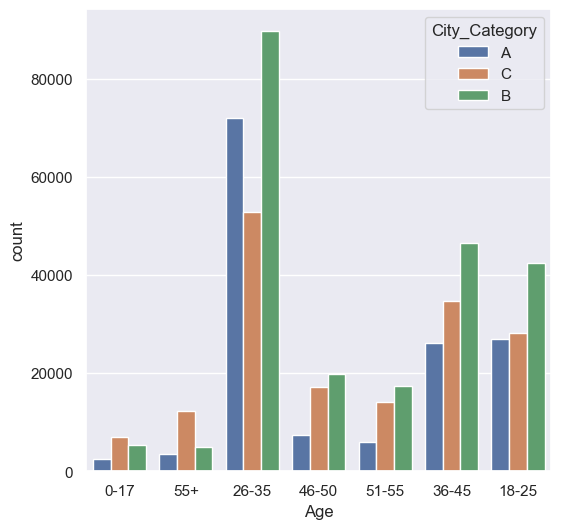

In [49]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

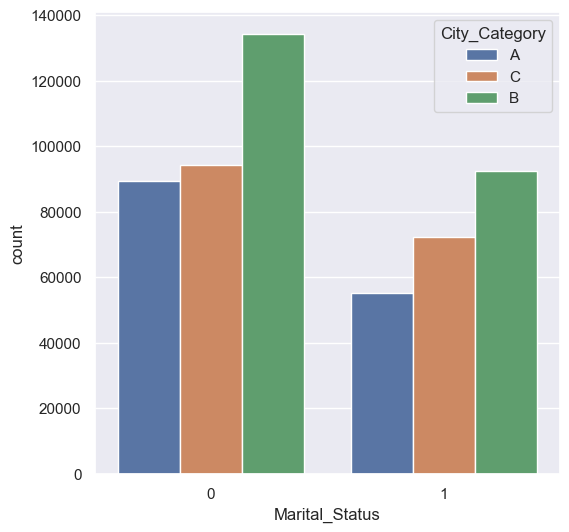

In [50]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<AxesSubplot:ylabel='None'>

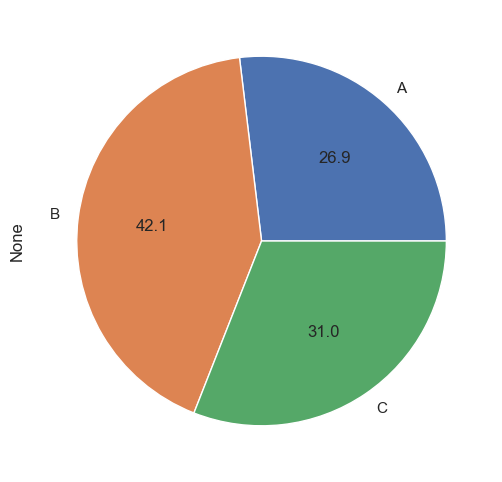

In [51]:

df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

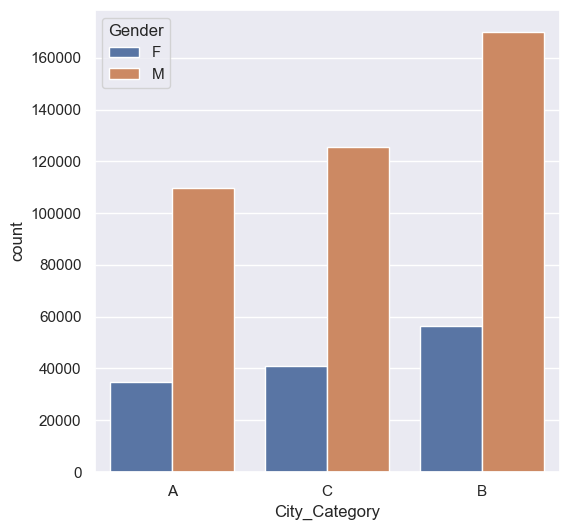

In [52]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<AxesSubplot:ylabel='Purchase'>

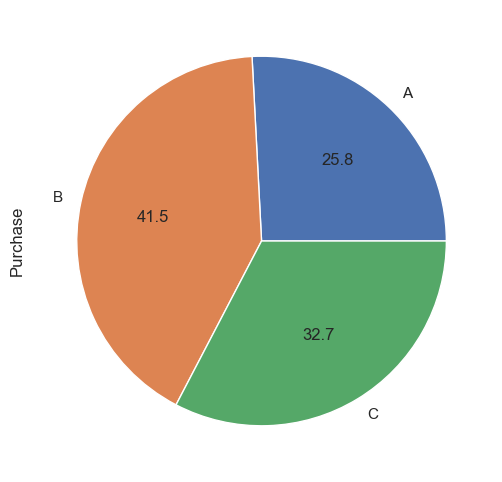

In [53]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:ylabel='Purchase'>

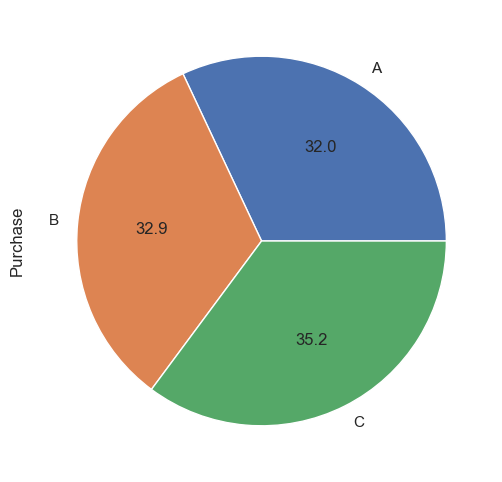

In [54]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

### Fitting normal distribution in purchase column

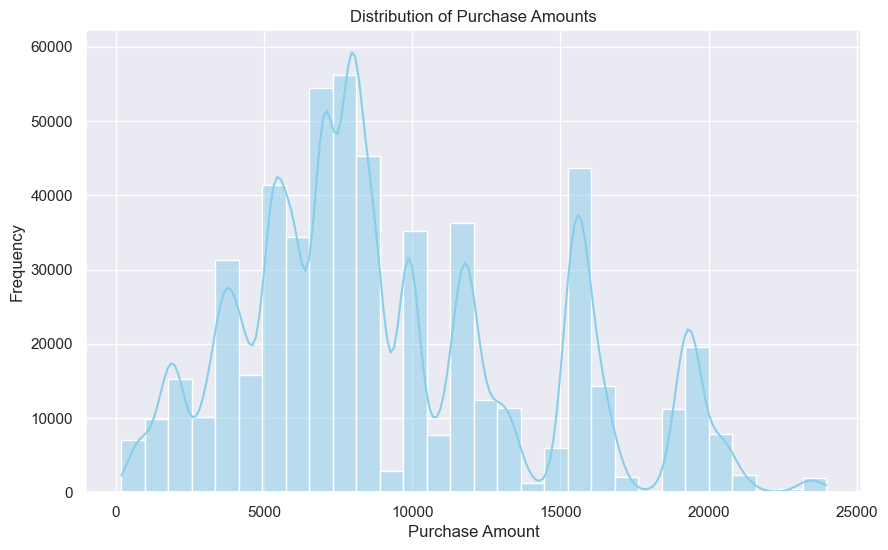

In [55]:
from scipy.stats import norm
from scipy.stats import probplot

data = df['Purchase']

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# -----------------------------------------------------------------------------------------
# Occupation and Product analysis

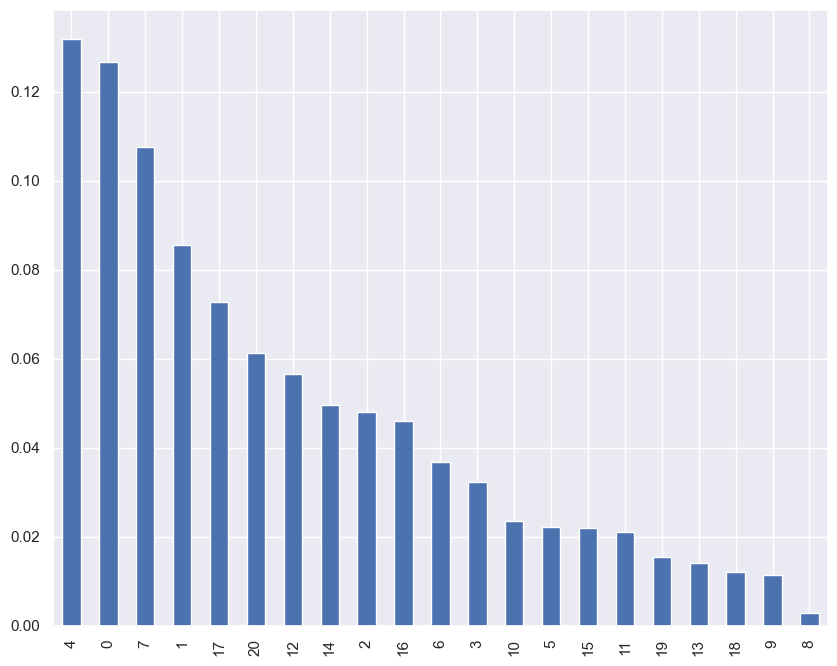

In [56]:
plt.figure(figsize = (10,8))
df.Occupation.value_counts(normalize = True).plot.bar()
plt.show()

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

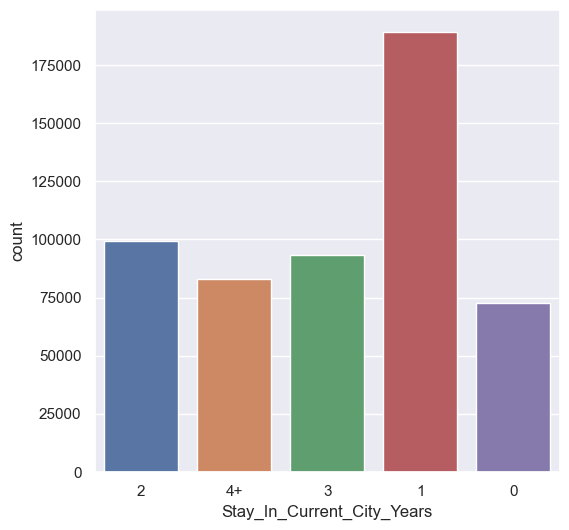

In [57]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

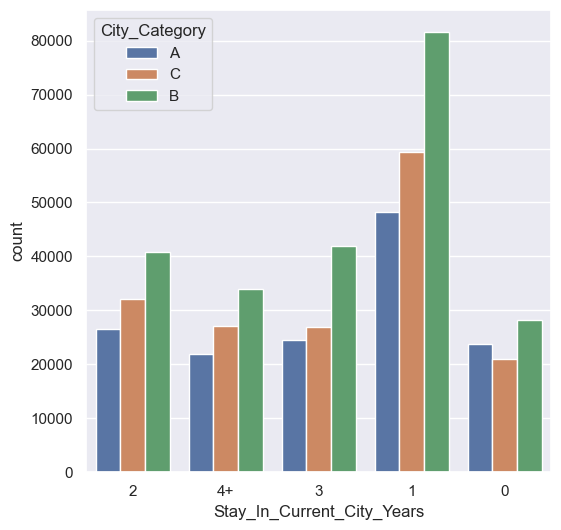

In [58]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

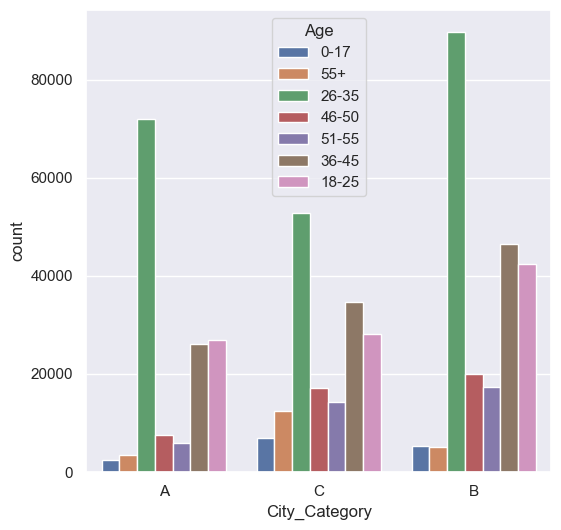

In [59]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

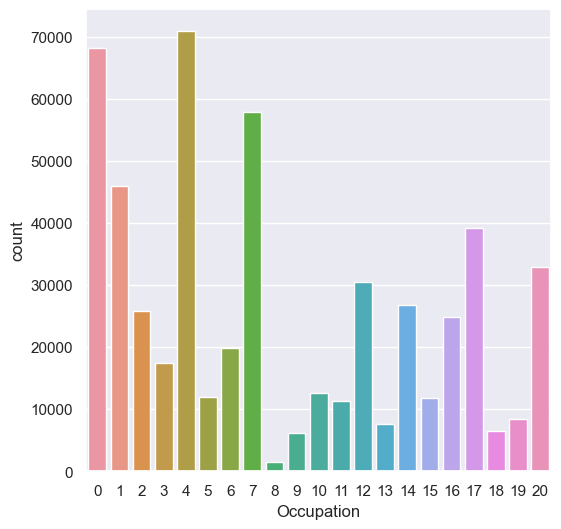

In [60]:
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

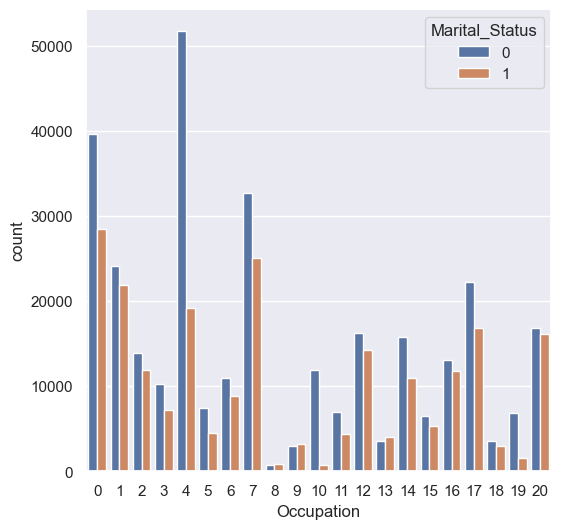

In [61]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

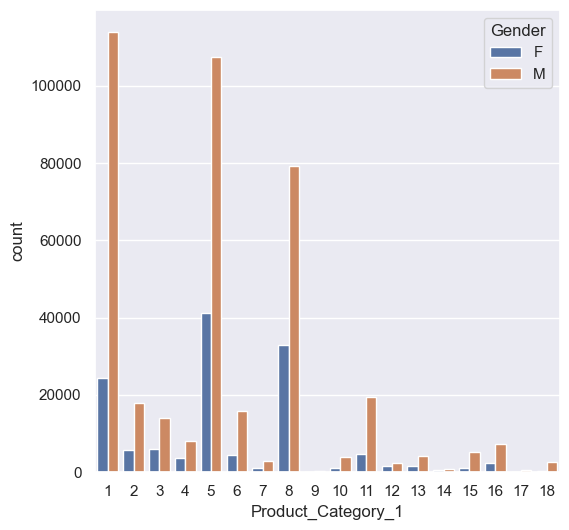

In [62]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Product_Category_1'>

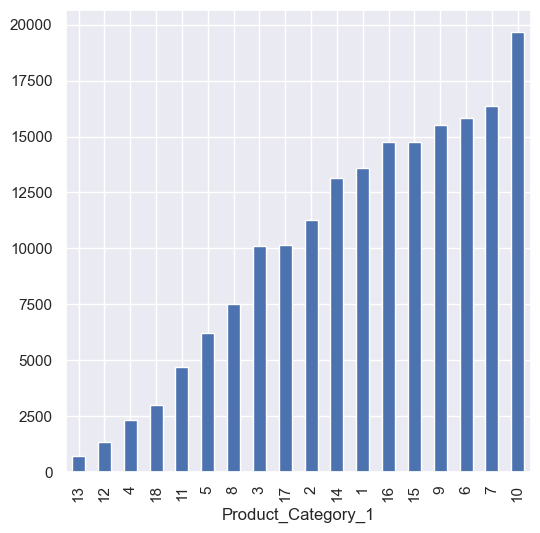

In [63]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

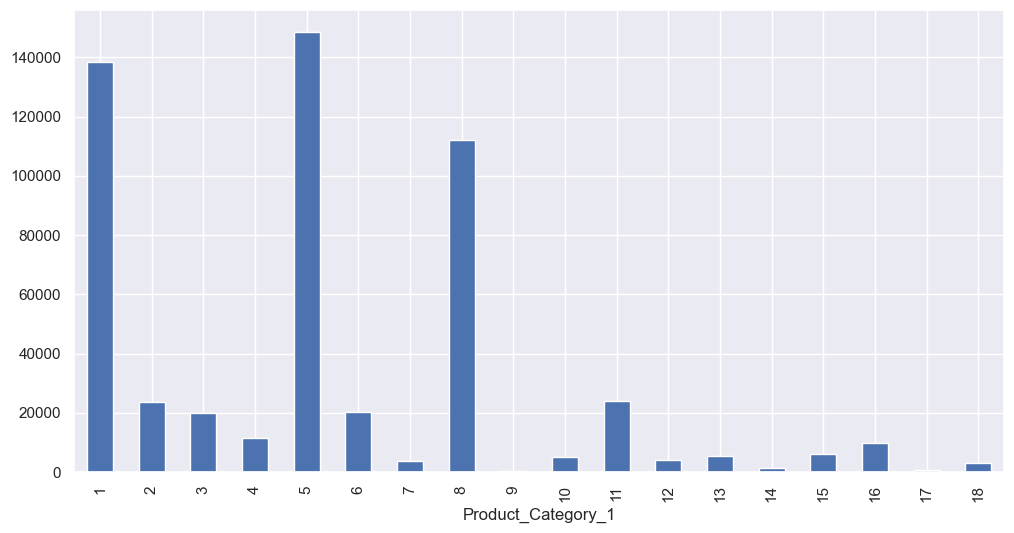

In [64]:
plt.figure(figsize = (12,6))
df.groupby('Product_Category_1').size().plot(kind = 'bar')
plt.show()

# -----------------------------------------------------------------------------------------
## Combining Age and Marital Status

In [65]:
df.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

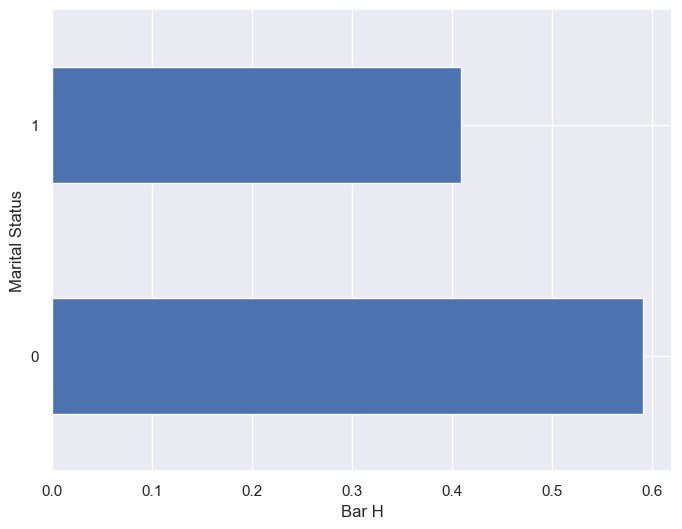

In [66]:
plt.figure(figsize = (8,6))
df.Marital_Status.value_counts(normalize = True).plot.barh()
plt.xlabel('Bar H')
plt.ylabel('Marital Status')
plt.show()

In [67]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [68]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

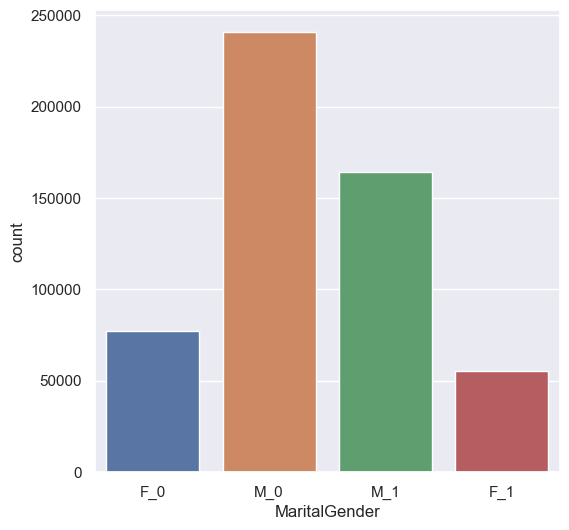

In [69]:
sns.countplot(x = df['MaritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

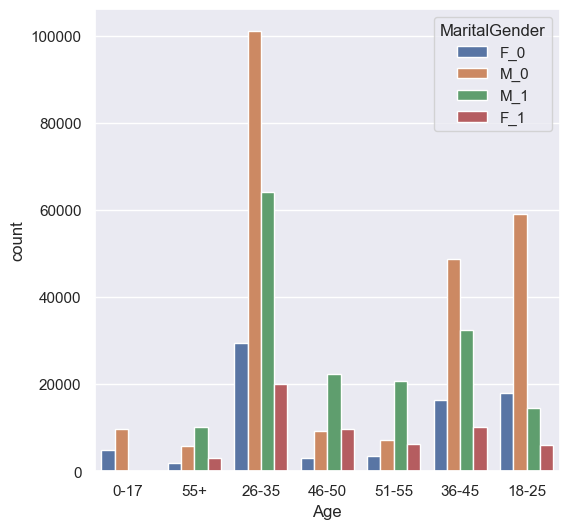

In [70]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

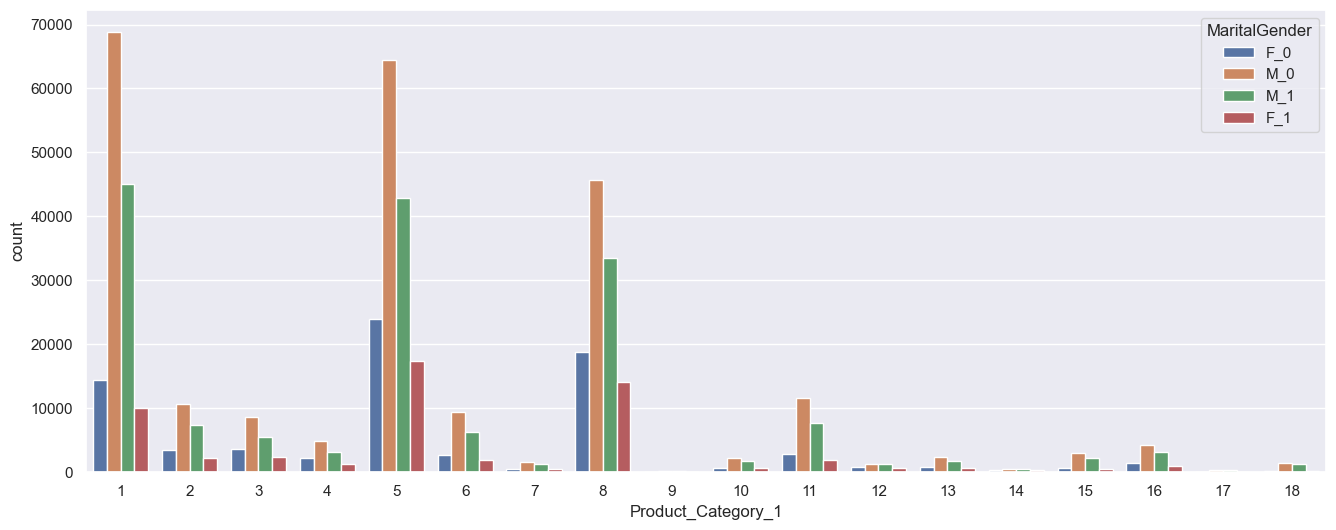

In [71]:
plt.figure(figsize = (16,6))
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])
plt.show()

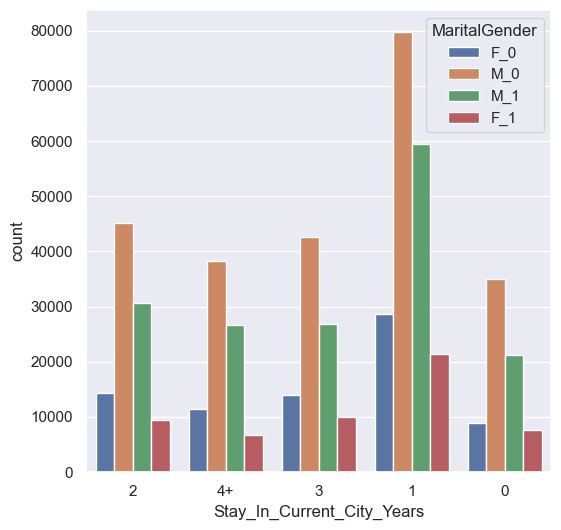

In [72]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])
plt.show()

# -----------------------------------------------------------------------------------------

# Questions and Answers

## 1.	What is the average purchase amount during Black Friday? !

In [73]:
average_purchase_amount = df['Purchase'].mean()
average_purchase_amount

9333.859852635065

## 2.	How many unique users made purchases on Black Friday?

In [74]:
unique_users = df['User_ID'].nunique()
unique_users

5891

## 3.	What is the distribution of ages among Black Friday shoppers?

Text(0, 0.5, 'Frequency')

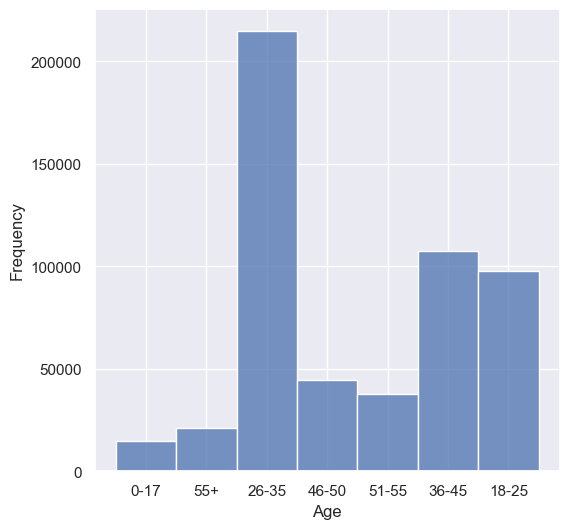

In [75]:
sns.histplot(data=df, x='Age', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')

## 4.	What is the most common city category for shoppers?

In [76]:
most_common_city_category = df['City_Category'].mode()[0]
most_common_city_category

'B'

## 5.	What is the average number of years shoppers have stayed in their current city? 

In [77]:
average_years_in_city = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int).mean()
average_years_in_city

1.859458272954386

## 6.	How many distinct product categories (Product_Category_1) are available in the dataset?

In [78]:
distinct_product_categories = df['Product_Category_1'].nunique()
distinct_product_categories

18

## 7.	What is the highest and lowest occupation code represented in the dataset? 

In [79]:
highest_occupation_code = df['Occupation'].max()
lowest_occupation_code = df['Occupation'].min()
print(highest_occupation_code, lowest_occupation_code)

20 0


## 8.	What is the distribution of genders among Black Friday shoppers? 

<AxesSubplot:xlabel='Gender', ylabel='count'>

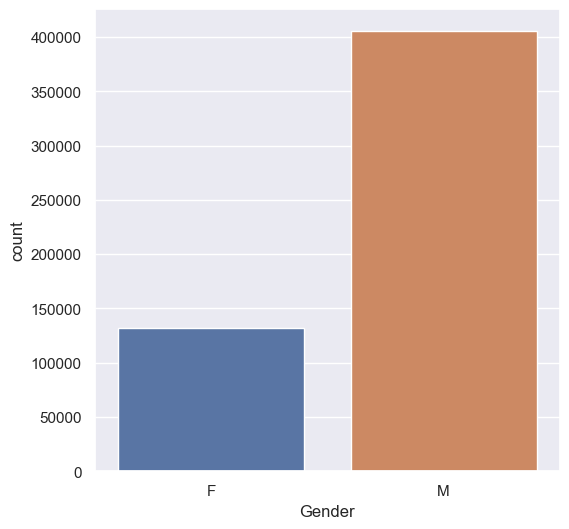

In [80]:
sns.countplot(data=df, x='Gender')

## 9.	How many unique products (Product_ID) were sold on Black Friday? 

In [81]:
unique_products_sold = df['Product_ID'].nunique()
unique_products_sold

3623

## 10.	What is the marital status distribution among shoppers?

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

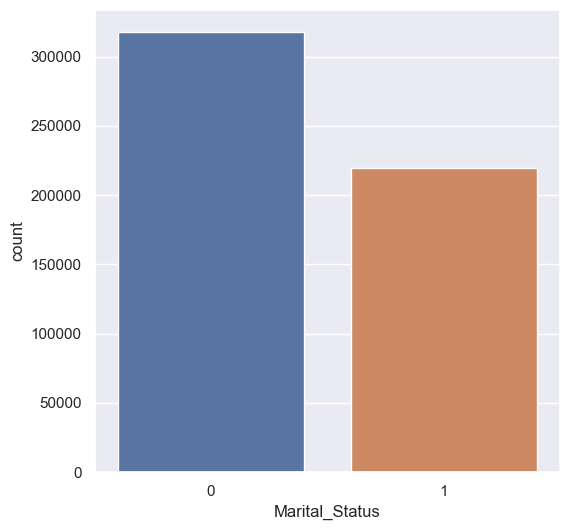

In [82]:
sns.countplot(data=df, x='Marital_Status')

## 11.	Is there a correlation between age and purchase amount? 

In [83]:
correlation = df.corr()
correlation

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,-0.314125
Purchase,0.005389,0.021104,0.000129,-0.314125,1.000000


## 12.	How does gender affect the choice of product categories (Product_Category_1)? 

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

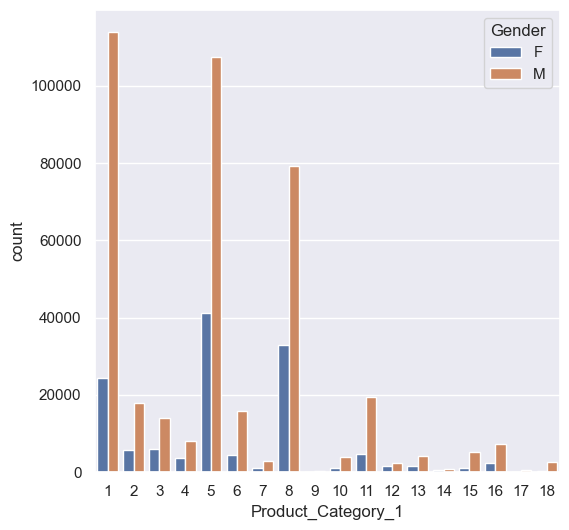

In [84]:
sns.countplot(data=df, x='Product_Category_1', hue='Gender')

## 13.	Do users who have stayed longer in their current city tend to make larger purchases? 

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

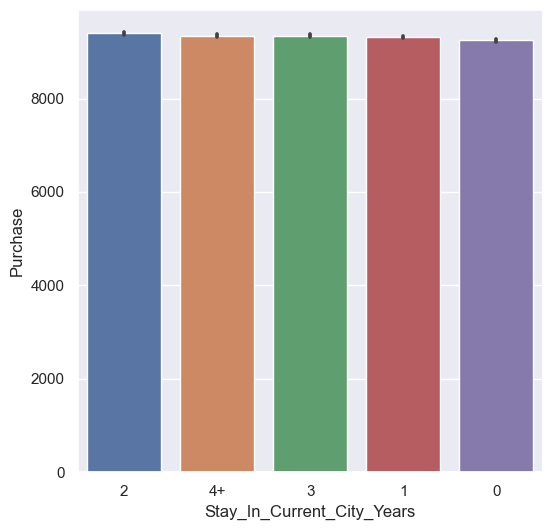

In [85]:
sns.barplot(data=df, x='Stay_In_Current_City_Years', y='Purchase')

## 14.	Are certain product categories (e.g., Product_Category_1, Product_Category_2) more popular than others? 

In [86]:
product_category_counts = df['Product_Category_1'].value_counts()
product_category_counts

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

## 15.	Is there a relationship between occupation and the types of products purchased? 

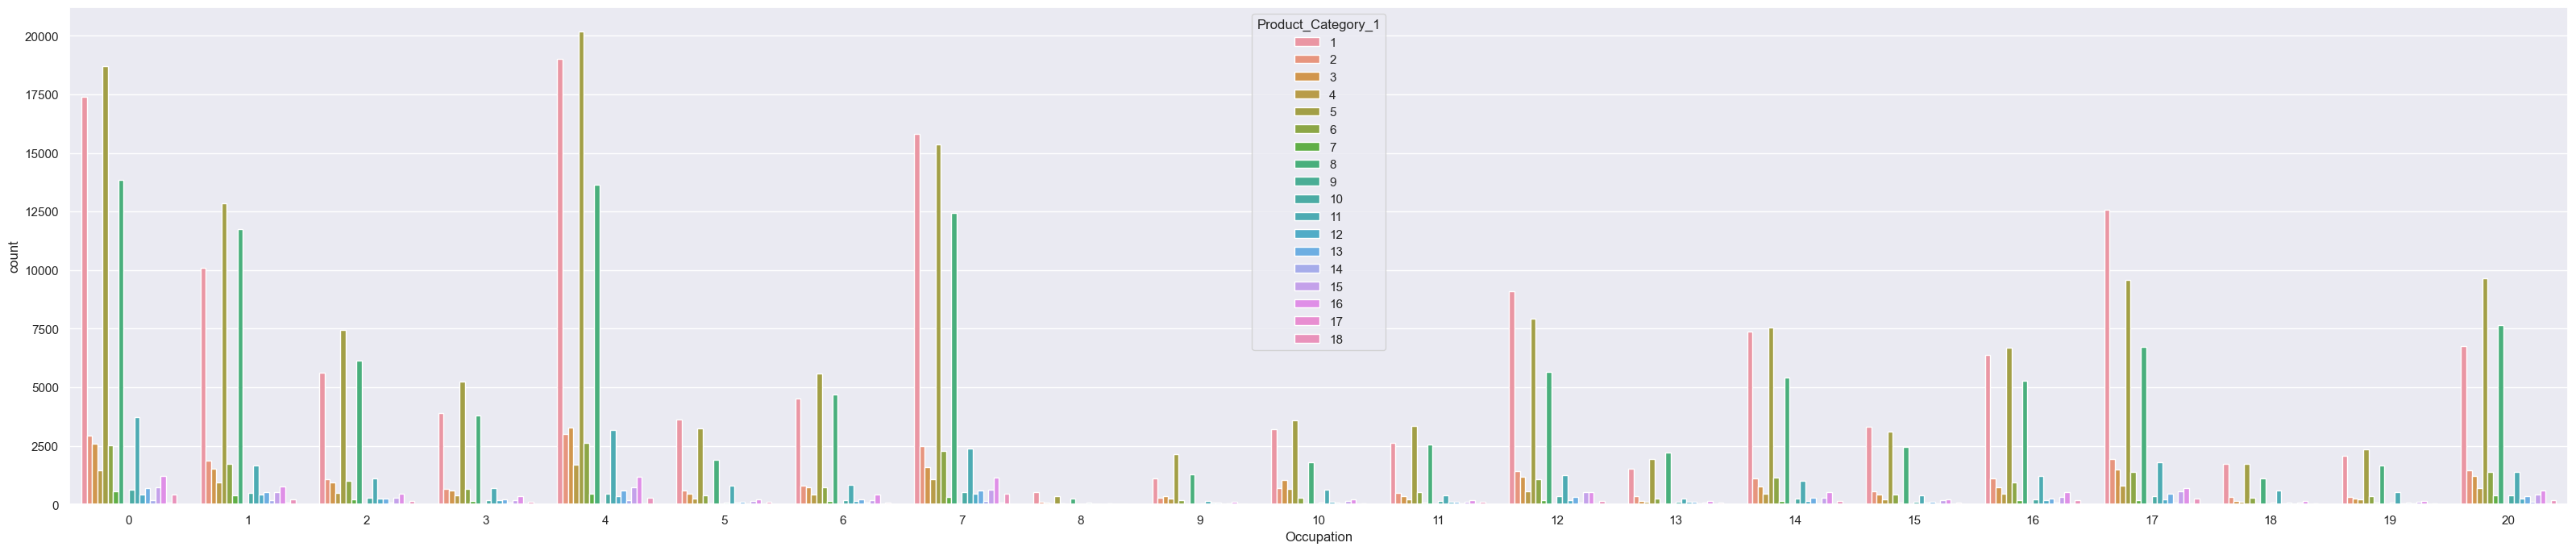

In [87]:
plt.figure(figsize = (40,8))
sns.countplot(data=df, x='Occupation', hue='Product_Category_1')
plt.show()

## 16.	Do marital status and gender influence purchase decisions? 

In [88]:
purchase_by_marital_gender = df.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()
purchase_by_marital_gender

Marital_Status  Gender
0               F         8753.809299
                M         9518.540223
1               F         8887.751553
                M         9484.617891
Name: Purchase, dtype: float64

## 17.	How many products fall into multiple categories (Product_Category_1, Product_Category_2, Product_Category_3)? 

In [89]:
df = pd.read_csv("BlackFriday.csv")

In [90]:
multi_category_products = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].count(axis=1)
num_multi_category_products = (multi_category_products > 1).sum()
num_multi_category_products

370591

## 18.	Are there any outliers in purchase amounts, and if so, what might explain them? 

Text(0.5, 0, 'Purchase Amount')

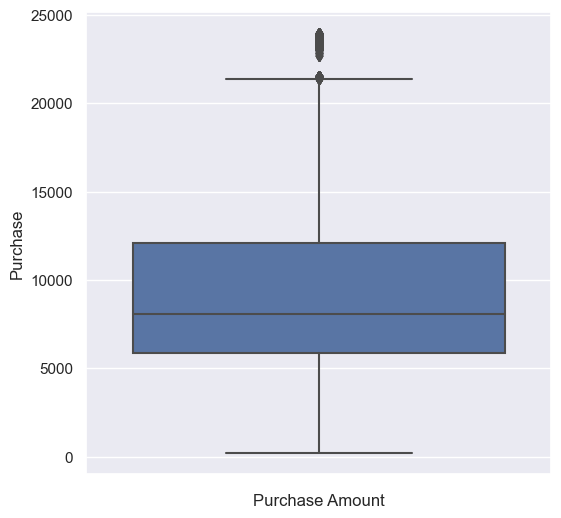

In [91]:
sns.boxplot(data=df, y='Purchase')
plt.xlabel('Purchase Amount')

## 19.	Is there a difference in purchase behavior between different city categories? 

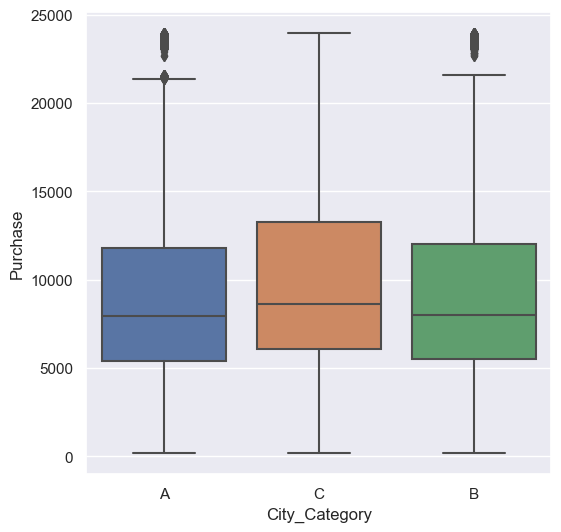

In [92]:
sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.show()

## 20. What are the most frequently purchased products, and do they belong to specific categories?

In [93]:
most_frequent_products = df['Product_ID'].value_counts().head(10)
frequent_products_categories = df[df['Product_ID'].isin(most_frequent_products.index)]['Product_Category_1'].unique()
print(most_frequent_products, frequent_products_categories)

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
Name: Product_ID, dtype: int64 [1 5 6 8]
